# **IMPORTING LIBRARIES**

In [1]:
### Importing the libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objs as go

### Importing the libraries for visualization
from matplotlib import pyplot
from matplotlib.lines import Line2D
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
from sklearn.mixture import GaussianMixture

### Importing the libraries for preprocessing
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

#For analysing cluster performancw
from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# **IMPORTING CSV FILE AND BASIC STATISTICS OF THE DATA**

In [2]:
customer_personality = pd.read_csv("customer_personality.csv",encoding='cp1252')

In [3]:
customer_personality

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
customer_personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Get the summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
customer_personality.describe()


Summary statistics of the dataframe:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


The total number of rows in the data after removing the rows with missing values are: 2216


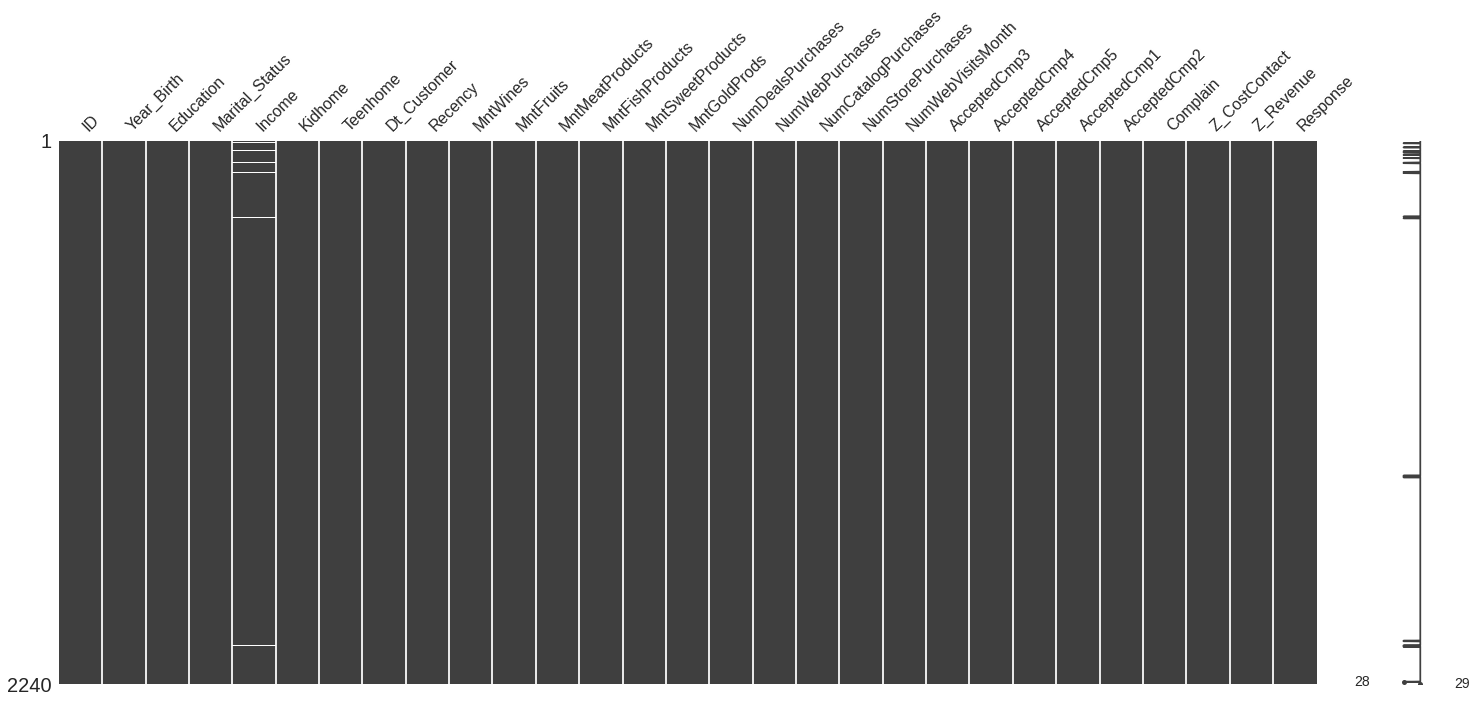

In [6]:
#Missing values
customer_personality.isnull().sum().sort_values(ascending = False)

# Visualize missing data
msno.matrix(customer_personality)
customer_personality = customer_personality.dropna()

# Removing the NA values
customer_personality = customer_personality.dropna()
print("The total number of rows in the data after removing the rows with missing values are:", 
      len(customer_personality))

In [7]:
#detecting duplicates
customer_personality.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2216, dtype: bool

# **ANALYSING OLD FEATURES AND CREATING NEW FEATURES**

In [8]:
#renaming columns for clarity
customer_personality=customer_personality.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                                                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [9]:
# Date format conversion
customer_personality["Dt_Customer"] = pd.to_datetime(customer_personality["Dt_Customer"])

In [10]:
#adding education level
customer_personality['Education_level'] = customer_personality['Education'].replace({'PhD':'PG','2n Cycle':"PG", 'Master':'PG','Graduation':'UG', 'Basic':'UG'})  

In [11]:
#calculating age of the customer
customer_personality["Age"] = 2023-customer_personality["Year_Birth"]

In [12]:
#Calculaing the Overall spendings of the customer in our company
#Adding all the money spent in all the products and adding a new column spent to put the value
customer_personality["Overall_Spending"] = customer_personality[["Wines","Fruits","Meat","Fish","Sweets","Gold"]].sum(axis=1)

In [13]:
#total accepted campaings of the customer
customer_personality['TotalAcceptedCmp'] = customer_personality[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [14]:
#Number of purchases the customer made in last 2 years
customer_personality['TotalPurchases'] = customer_personality[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']].sum(axis=1)

In [15]:
#Deriving living situation by marital status"Alone"
customer_personality['Marital_Status']=customer_personality["Marital_Status"].replace({'Single':'Alone', 'Together':'Together', 'Married':'Together', 'Divorced':'Alone', 'Widow':'Alone', 'Alone':'Alone',
       'Absurd':'Alone', 'YOLO':'Alone'})
customer_personality['Marital_Status']=customer_personality["Marital_Status"].replace({'Alone':"1","Together":"2"})

In [16]:
customer_personality['Marital_Status']=customer_personality['Marital_Status'].astype(str).astype(int)

In [17]:
#Feature indicating total children living in the household
customer_personality["Children"]=customer_personality[["Kidhome","Teenhome"]].sum(axis=1)

In [18]:
customer_personality["Family_Size"] = customer_personality["Marital_Status"]+customer_personality["Children"]

In [19]:
#Feature pertaining parenthood
customer_personality["Is_Parent"] = np.where(customer_personality.Children> 0,1,0)

In [20]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer","Kidhome","Teenhome","Year_Birth","Z_CostContact", 
           "Z_Revenue","ID","Education",'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
           'NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
           'Response','Children','Complain','NumWebVisitsMonth']
customer_personality = customer_personality.drop(to_drop, axis=1)
customer_personality.head().T

,0,1,2,3,4
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58,38,26,26,94
Wines,635,11,426,11,173
Fruits,88,1,49,4,43
Meat,546,6,127,20,118
Fish,172,2,111,10,46
Sweets,88,1,21,3,27
Gold,88,6,42,5,15
Education_level,UG,UG,UG,UG,PG
Age,66,69,58,39,42


# **VISUALIZING THE FEATURES FOR BETTER UNDERSTANDING AND FINDING OUTLIERS**

In [21]:
#Visualisation of outliers
fig=make_subplots(rows=3,cols=2,subplot_titles=('<i>Age', '<i>Income', '<i>TotalPurchases', '<i>Overall_Spending',
                                                '<i>Customer_For_Days','<i>Family_Size',
                                                '<i>Recency','<i>Education Level'))
fig.add_trace(go.Box(x=customer_personality['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Box(x=customer_personality['Income'],name='Income'),row=1,col=2)
fig.add_trace(go.Box(x=customer_personality['TotalPurchases'],name='TotalPurchases'),row=2,col=1)
fig.add_trace(go.Box(x=customer_personality['Overall_Spending'],name='Overall_Spending'),row=2,col=2)
fig.add_trace(go.Box(x=customer_personality['Family_Size'],name='Family_Size'),row=3,col=1)
fig.add_trace(go.Box(x=customer_personality['Recency'],name='Recency'),row=3,col=2)


fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots to Check Outliers', font_size=20)


In [22]:
# Dropping the outliers by setting a cap on Age, Overall Spending and income. 

customer_personality = customer_personality[(customer_personality["Age"]<90)]

# Calculate the IQR for the Income column
Q1 = customer_personality['Income'].quantile(0.25)
Q3 = customer_personality['Income'].quantile(0.75)
IQR = Q3 - Q1
customer_personality = customer_personality[~((customer_personality['Income'] < (Q1 - 1.5 * IQR)) | (customer_personality['Income'] > (Q3 + 1.5 * IQR)))]

print("The total number of data after removing the outliers are:", len(customer_personality))

The total number of data after removing the outliers are: 2205


In [23]:
#Visualisation after removing outliers
fig=make_subplots(rows=3,cols=2,subplot_titles=('<i>Age', '<i>Income', '<i>TotalPurchases', '<i>Overall_Spending',
                                                '<i>Customer_For_Days','<i>Family_Size',
                                                '<i>Recency','<i>Education Level'))
fig.add_trace(go.Box(x=customer_personality['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Box(x=customer_personality['Income'],name='Income'),row=1,col=2)
fig.add_trace(go.Box(x=customer_personality['TotalPurchases'],name='TotalPurchases'),row=2,col=1)
fig.add_trace(go.Box(x=customer_personality['Overall_Spending'],name='Overall_Spending'),row=2,col=2)
fig.add_trace(go.Box(x=customer_personality['Family_Size'],name='Family_Size'),row=3,col=1)
fig.add_trace(go.Box(x=customer_personality['Recency'],name='Recency'),row=3,col=2)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots after removing Outliers', font_size=20)


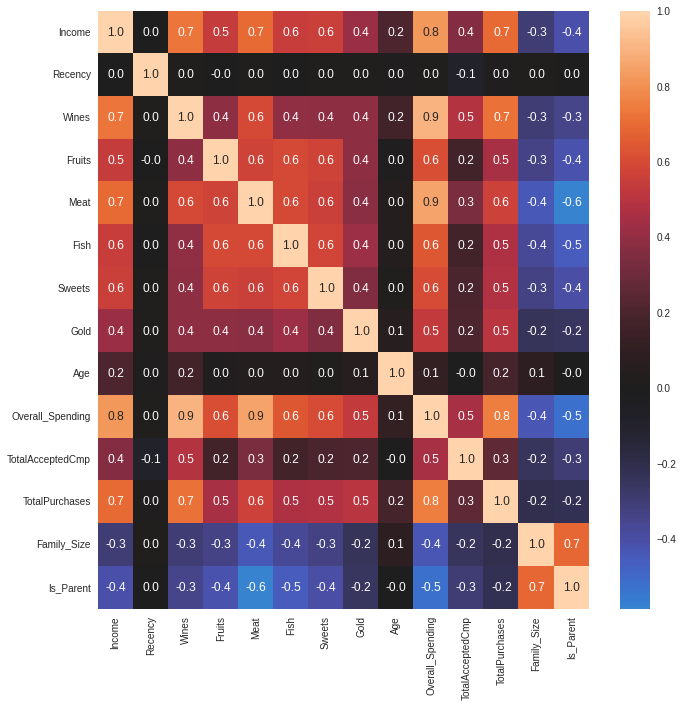

In [24]:
# correlation matrix
corrmat= customer_personality.corr()
plt.figure(figsize=(11,11))  
sns.heatmap(corrmat,annot=True, fmt=".1f", center=0)

In [25]:
#Dropping some of the redundant features
to_drop = ['Recency',"Age"]
customer_personality = customer_personality.drop(to_drop, axis=1)

# **DATA SCALING**

In [26]:
customer_personality.describe().round(2)

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Overall_Spending,TotalAcceptedCmp,TotalPurchases,Family_Size,Is_Parent
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00
mean,51622.09,306.16,26.40,165.31,37.76,27.13,44.06,606.82,0.45,14.89,2.59,0.72
std,20713.06,337.49,39.78,217.78,54.82,41.13,51.74,601.68,0.89,7.62,0.91,0.45
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,1.00,0.00
25%,35196.00,24.00,2.00,16.00,3.00,1.00,9.00,69.00,0.00,8.00,2.00,0.00
50%,51287.00,178.00,8.00,68.00,12.00,8.00,25.00,397.00,0.00,15.00,3.00,1.00
75%,68281.00,507.00,33.00,232.00,50.00,34.00,56.00,1047.00,1.00,21.00,3.00,1.00
max,113734.00,1493.00,199.00,1725.00,259.00,262.00,321.00,2525.00,5.00,43.00,5.00,1.00


In [27]:
# Select the numerical columns to scale
num_cols = ['Income','TotalPurchases', 'Overall_Spending',
            'Family_Size','TotalAcceptedCmp',
            'Wines',"Fruits",'Meat','Fish','Sweets','Gold']

# Fit the scaler to the numerical columns
scaler = StandardScaler()
scaled_customer_personality = scaler.fit_transform(customer_personality[num_cols])
scaled_customer_personality = pd.DataFrame(scaled_customer_personality, columns=num_cols)
scaled_customer_personality.describe().round(2)

,Income,TotalPurchases,Overall_Spending,Family_Size,TotalAcceptedCmp,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.41,-1.96,-1.00,-1.76,-0.50,-0.91,-0.66,-0.76,-0.69,-0.66,-0.85
25%,-0.79,-0.90,-0.89,-0.66,-0.50,-0.84,-0.61,-0.69,-0.63,-0.64,-0.68
50%,-0.02,0.01,-0.35,0.45,-0.50,-0.38,-0.46,-0.45,-0.47,-0.47,-0.37
75%,0.80,0.80,0.73,0.45,0.61,0.60,0.17,0.31,0.22,0.17,0.23
max,3.00,3.69,3.19,2.66,5.09,3.52,4.34,7.16,4.04,5.71,5.35


Z-Score normalisation used

# **PCA ANALYSIS**

In [28]:
### Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_customer_personality)

PCA_customer_personality = pd.DataFrame(pca.transform(scaled_customer_personality), columns=(["col1","col2", "col3"]))

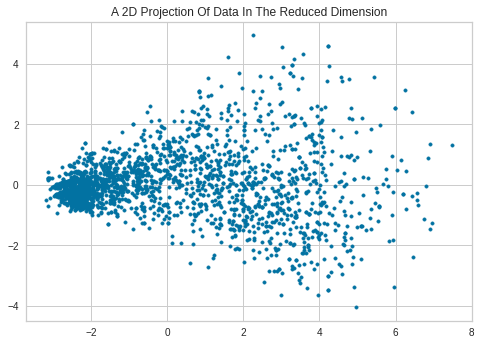

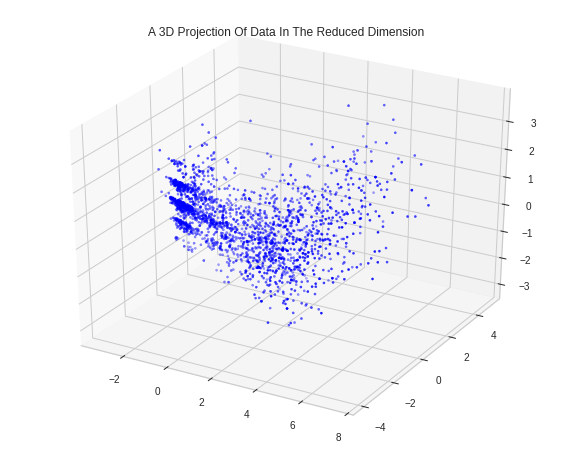

In [29]:
x =PCA_customer_personality["col1"]
y =PCA_customer_personality["col2"]
z =PCA_customer_personality["col3"]

#2d plotting
plt.scatter(x,y, cmap='blue',marker=".")
plt.title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

# 3D Plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="." )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **DETERMINE THE NUMBER OF CLUSTERS**

Elbow Method to determine the number of clusters to be formed:


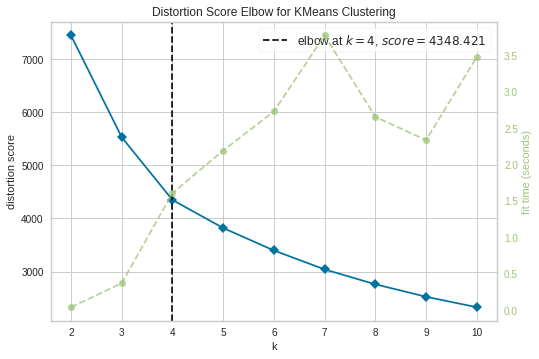

In [30]:
# Examination of to find numbers of clusters to make.
#elbow method
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_customer_personality)
Elbow_M.show()

# **K-MEANS CLUSTERING**

In [31]:
# Initialising K-Means cluster
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 25, random_state = 123)

### fit model and predict clusters
y_kmeans = kmeans.fit(PCA_customer_personality)
KP = kmeans.predict(PCA_customer_personality)
PCA_customer_personality["kmeans_Clusters"] = KP

#Adding the Clusters feature to the orignal dataframe.
customer_personality["kmeans_Clusters"]= KP

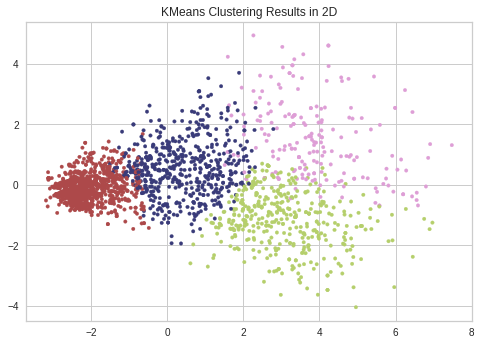

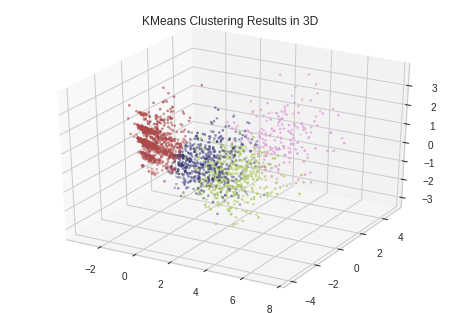

In [32]:
x =PCA_customer_personality["col1"]
y =PCA_customer_personality["col2"]
z =PCA_customer_personality["col3"]

# Visualize the results in 2D
plt.scatter(x, y,c=customer_personality["kmeans_Clusters"], cmap='tab20b',marker=".")
plt.title('KMeans Clustering Results in 2D')
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c= PCA_customer_personality["kmeans_Clusters"], cmap='tab20b',marker=".")
ax.set_title('KMeans Clustering Results in 3D')
plt.show()

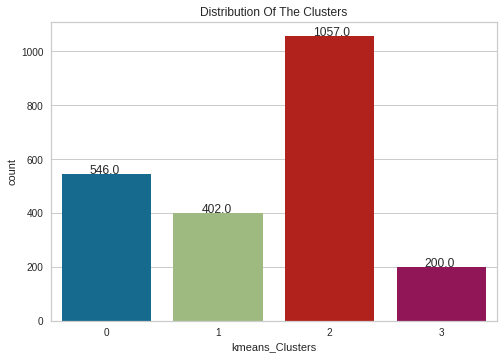

In [33]:
#count and distribution of clusters
fig = sns.countplot(x=customer_personality["kmeans_Clusters"]) 
for p in fig.patches:
   fig.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
fig.set_title("Distribution Of The Clusters") 
plt.show()

# **AGGLOMERATIVE CLUSTERING**

In [34]:
### Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

### fit model and predict clusters
ACP = AC.fit_predict(PCA_customer_personality)
PCA_customer_personality["Agglomerative_Clusters"] = ACP

#Adding the Clusters feature to the orignal dataframe.
customer_personality["Agglomerative_Clusters"]= ACP

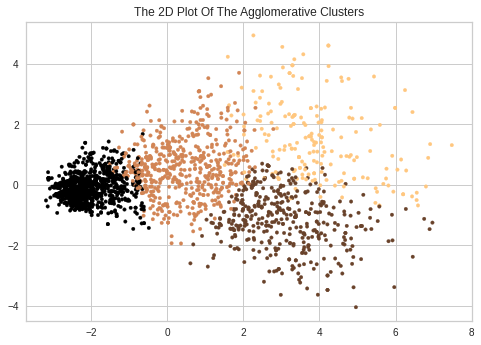

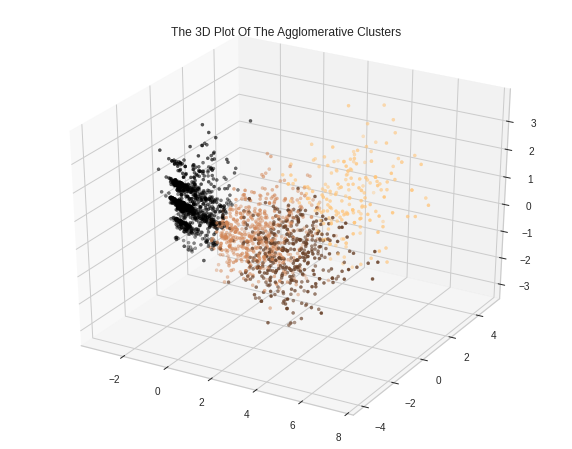

In [35]:
x =PCA_customer_personality["col1"]
y =PCA_customer_personality["col2"]
z =PCA_customer_personality["col3"]

# Plot the data points colored by their cluster labels in 2D
plt.scatter(x,y, c=AC.labels_, cmap='copper',marker=".")
plt.title("The 2D Plot Of The Agglomerative Clusters")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_customer_personality["Agglomerative_Clusters"], cmap='copper', marker=".")
ax.set_title("The 3D Plot Of The Agglomerative Clusters")
plt.show()

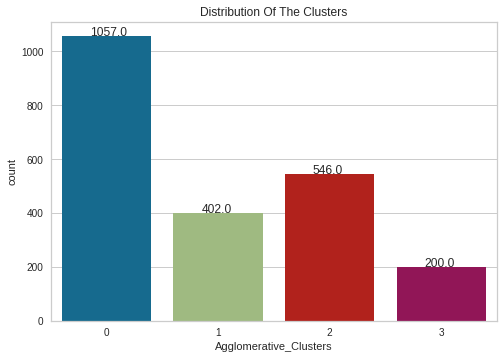

In [36]:
#count and distribution of clusters
ax = sns.countplot(x=customer_personality["Agglomerative_Clusters"]) 
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters") 
plt.show()

# **GAUSSIAN MIXTURE MODEL CLUSTERING**

In [37]:
#GMM model
gmm=GaussianMixture(n_components=4, covariance_type='full').fit(PCA_customer_personality)


# Get the predictions
GP=gmm.predict(PCA_customer_personality)
PCA_customer_personality["GMM_Clusters"] = GP

#Adding the Clusters feature to the orignal dataframe.
customer_personality["GMM_Clusters"]= GP

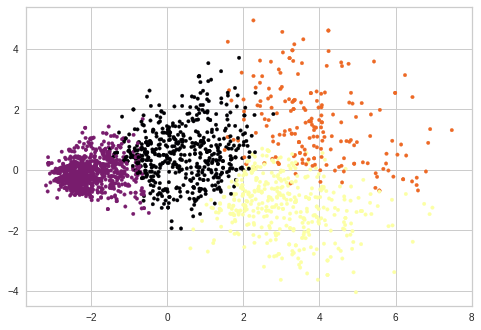

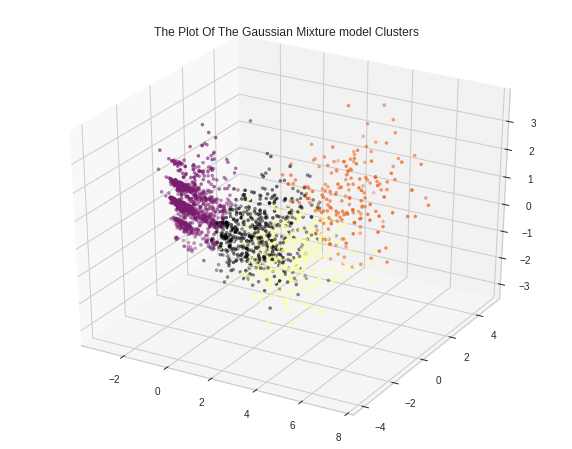

In [38]:
x =PCA_customer_personality["col1"]
y =PCA_customer_personality["col2"]
z =PCA_customer_personality["col3"]

# Plot the data points colored by their cluster labels in 2D
plt.scatter(x,y, c=GP, cmap='inferno',marker=".")
plt.show()

# Plotting the clusters in 3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=customer_personality["GMM_Clusters"], cmap='inferno', marker=".")
ax.set_title("The Plot Of The Gaussian Mixture model Clusters")
plt.show()

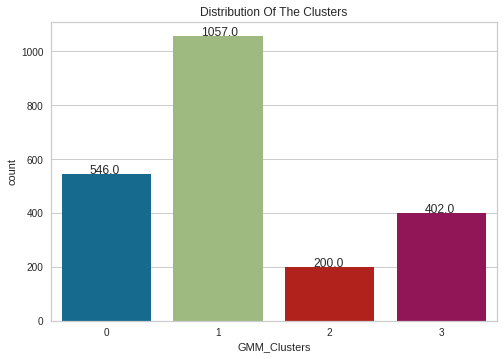

In [39]:
#count and distribution of clusters
ax = sns.countplot(x=customer_personality["GMM_Clusters"]) 
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title("Distribution Of The Clusters") 
plt.show()

# **CLUSTER PERFORMANCE ANALYSIS**

In [40]:
#Cluster performance analysis
#Silhouette
ss_km = silhouette_score(PCA_customer_personality, kmeans.labels_)
print("Silhouette score of the Model:",ss_km)

# Davies-Bouldin Index
dbi_km = davies_bouldin_score(PCA_customer_personality,  kmeans.labels_)
print("The  Davies-Bouldin Index of the model:",dbi_km)

#Mutual Information
mi_km = mutual_info_score(ACP,  kmeans.labels_)
print("The Mutual Information score of the model:",mi_km)

Silhouette score of the Model: 0.6067623090112892
The  Davies-Bouldin Index of the model: 0.7030997314025746
The Mutual Information score of the model: 1.2261204347036163


In [41]:
#Cluster performance analysis
#Silhouette
ss_ag = silhouette_score(PCA_customer_personality, AC.labels_)
print("Silhouette score of the Model:",ss_ag)

# Davies-Bouldin Index
dbi_ag = davies_bouldin_score(PCA_customer_personality, AC.labels_)
print("The  Davies-Bouldin Index of the model:",dbi_ag)

#Mutual Information
mi_ag = mutual_info_score(ACP, AC.labels_)
print("The Mutual Information score of the model:",mi_ag)

Silhouette score of the Model: 0.6067623090112892
The  Davies-Bouldin Index of the model: 0.7030997314025746
The Mutual Information score of the model: 1.2261204347036163


In [42]:
#Cluster performance analysis
#Silhouette
ss_gm = silhouette_score(PCA_customer_personality, GP)
print("Silhouette score of the Model:",ss_gm)

# Davies-Bouldin Index
dbi_gm = davies_bouldin_score(PCA_customer_personality, GP)
print("The  Davies-Bouldin Index of the model:",dbi_gm)

#Mutual Information
mi_gm = mutual_info_score(ACP,  GP)
print("The Mutual Information score of the model:",mi_gm)

Silhouette score of the Model: 0.6067623090112892
The  Davies-Bouldin Index of the model: 0.7030997314025746
The Mutual Information score of the model: 1.2261204347036163


# **UNDERSTANDING EACH CLUSTER:**

In [43]:
#finding categorical variable
cv = (customer_personality.dtypes == 'object')

object_cols = list(cv[cv].index)

print("Categorical variables in the dataset:", object_cols)
customer_personality = pd.get_dummies(customer_personality, columns = ['Education_level'])

Categorical variables in the dataset: ['Education_level']


In [44]:
customer_personality.agg({
    'Education_level_PG': 'mean', 'Education_level_UG': 'mean',
    'Is_Parent': 'mean', 'Family_Size':'median', 'Income': 'median',
    'Overall_Spending': 'median','TotalPurchases':'median', 'TotalAcceptedCmp':'median',
    'Wines' :'median',"Fruits":'median','Meat':'median',
    'Fish':'median','Sweets':'median','Gold':'median'}).round(2)

Education_level_PG        0.47
Education_level_UG        0.53
Is_Parent                 0.72
Family_Size               3.00
Income                51287.00
Overall_Spending        397.00
TotalPurchases           15.00
TotalAcceptedCmp          0.00
Wines                   178.00
Fruits                    8.00
Meat                     68.00
Fish                     12.00
Sweets                    8.00
Gold                     25.00
dtype: float64

In [45]:
#kmeans
customer_personality.groupby('kmeans_Clusters').agg({
    'Education_level_PG': 'mean', 'Education_level_UG': 'mean',
    'Is_Parent': 'mean', 'Family_Size':'median', 'Income': 'median',
    'Overall_Spending': 'median','TotalPurchases':'median', 'TotalAcceptedCmp':'median',
    'Wines' :'median',"Fruits":'median','Meat':'median',
    'Fish':'median','Sweets':'median','Gold':'median'}).round(2)

,Education_level_PG,Education_level_UG,Is_Parent,Family_Size,Income,Overall_Spending,TotalPurchases,TotalAcceptedCmp,Wines,Fruits,Meat,Fish,Sweets,Gold
kmeans_Clusters,,,,,,,,,,,,,,
0,0.53,0.47,0.87,3.0,59081.5,670.0,20.0,0.0,403.5,13.0,119.0,19.0,13.0,42.0
1,0.36,0.64,0.34,2.0,72537.0,1198.0,21.0,0.0,445.5,74.5,379.5,104.0,72.5,71.0
2,0.46,0.54,0.88,3.0,34824.0,66.0,7.0,0.0,23.0,2.0,15.0,3.0,2.0,10.0
3,0.58,0.42,0.16,2.0,81636.0,1685.5,21.0,2.0,960.0,34.0,454.5,58.0,45.0,45.0


In [46]:
#agglomerative
customer_personality.groupby('Agglomerative_Clusters').agg({    
    'Education_level_PG': 'mean', 'Education_level_UG': 'mean',
    'Is_Parent': 'mean', 'Family_Size':'median', 'Income': 'median',
    'Overall_Spending': 'median','TotalPurchases':'median', 'TotalAcceptedCmp':'median',
    'Wines' :'median',"Fruits":'median','Meat':'median',
    'Fish':'median','Sweets':'median','Gold':'median'}).round(2)

,Education_level_PG,Education_level_UG,Is_Parent,Family_Size,Income,Overall_Spending,TotalPurchases,TotalAcceptedCmp,Wines,Fruits,Meat,Fish,Sweets,Gold
Agglomerative_Clusters,,,,,,,,,,,,,,
0,0.46,0.54,0.88,3.0,34824.0,66.0,7.0,0.0,23.0,2.0,15.0,3.0,2.0,10.0
1,0.36,0.64,0.34,2.0,72537.0,1198.0,21.0,0.0,445.5,74.5,379.5,104.0,72.5,71.0
2,0.53,0.47,0.87,3.0,59081.5,670.0,20.0,0.0,403.5,13.0,119.0,19.0,13.0,42.0
3,0.58,0.42,0.16,2.0,81636.0,1685.5,21.0,2.0,960.0,34.0,454.5,58.0,45.0,45.0


In [47]:
#birch
customer_personality.groupby('GMM_Clusters').agg({
    'Education_level_PG': 'mean', 'Education_level_UG': 'mean',
    'Is_Parent': 'mean', 'Family_Size':'median', 'Income': 'median',
    'Overall_Spending': 'median','TotalPurchases':'median', 'TotalAcceptedCmp':'median',
    'Wines' :'median',"Fruits":'median','Meat':'median',
    'Fish':'median','Sweets':'median','Gold':'median'}).round(2)

,Education_level_PG,Education_level_UG,Is_Parent,Family_Size,Income,Overall_Spending,TotalPurchases,TotalAcceptedCmp,Wines,Fruits,Meat,Fish,Sweets,Gold
GMM_Clusters,,,,,,,,,,,,,,
0,0.53,0.47,0.87,3.0,59081.5,670.0,20.0,0.0,403.5,13.0,119.0,19.0,13.0,42.0
1,0.46,0.54,0.88,3.0,34824.0,66.0,7.0,0.0,23.0,2.0,15.0,3.0,2.0,10.0
2,0.58,0.42,0.16,2.0,81636.0,1685.5,21.0,2.0,960.0,34.0,454.5,58.0,45.0,45.0
3,0.36,0.64,0.34,2.0,72537.0,1198.0,21.0,0.0,445.5,74.5,379.5,104.0,72.5,71.0
